In [1]:
#zona imports.
import re
from graphviz import Digraph
import networkx as nx
from scipy import stats
from scipy.stats import rv_discrete
import matplotlib.pyplot as plt

In [2]:
terminales = ["u","a","g","i","j","k","b","c","d","e","f"]#AGREGAR PARA NUEVAS PRODUCCIONES

In [3]:
no_terminales = ["W","X","Y","Z","A","C"] #AGREGAR PARA NUEVAS PRODUCCIONES

In [4]:
#AGREGAR PARA NUEVAS PRODUCCIONES

x0 = [0,1]
x1 = [0,1]
x2 = [0,1]
x3 = [0,1]
x4 = [0,1]
x5 = [0,1]
x6 = [0,1]
x7 = [0,1]

p0 = (1.0,0)
p1 = (1.0,0)
p2 = (0.7,0.3) 
p3 = (0.2,0.8)
p4 = (0.5,0.5)
p5 = (0.6,0.4)
p6 = (1.0,0)
p7 = (1.0,0)


prod1 = {
    "S" : [["W"],rv_discrete("W",values=([x0,p0]))],
    "W" : [["uX"],rv_discrete("uX",values = ([x1,p1]))],
    "X" : [["aY","cZ"],rv_discrete("prodX",values = ([x2,p2]))],
    "Y" : [["a","b"],rv_discrete("prodY",values = ([x3,p3]))],
    "Z" : [["gAB","dg"],rv_discrete("prodZ",values = ([x4,p4]))],
    "A" : [["ijk","kiC"],rv_discrete("prodA",values = ([x5,p5]))],
    "B" : [["eB"],rv_discrete("prodB",values = ([x6,p6]))],
    "C" : [["fA"],rv_discrete("prodC",values = ([x7,p7]))]
    
}

In [5]:
primer_prod = "S"

In [6]:
#####
#####
#####
##Dar inicio a las producciones.
##Ellas deberian poder saber cuando llamar la recursividad por pipe o por no terminal.
#####
#####
#####
def producir_recur1(iteracion,G,dot):#NUEVA
    
    sig_prod = prod1[primer_prod]
    producir(sig_prod[0],primer_prod,G,dot,iteracion)

   

In [7]:
def generar_graph(lista):
    G=nx.Graph()
    G.add_nodes_from(["W","u","X","g","Z","a"])

    G.add_edges_from([("W","u"),("W","X"),("X","g"), ("X","Z"),("Z","a")])

    nx.draw_networkx(G)
    plt.show() # display

In [8]:
def producir(producciones, produccion_origen,G,dot, iteraciones):##NUEVA
    plt.show()
    ''' Caso Base profundidad alcanzada '''
    if iteraciones == 0:
        print("Corto por limite de  iteracion")
        return
    
    ''' Caso Base '''
    for p in producciones:
        
        dot.node(p,p)
        dot.edge(produccion_origen, p, constraint='false')
        
        G.add_node(p)
        G.add_edge(p,produccion_origen)
       
        if (p not in terminales):
            print("dibujar no Terminal {}".format(p))
                
            valores = prod1.get(p)#Obtengo los valores posibles de la produccion.
            prob_result = valores[1].rvs()#Obtengo un int que es el indice de las prob values posibles.
            prob_posib = valores[0]#Obtengo las posibles producciones de esta produccion
            produc = prob_posib[prob_result]#Obtengo la probabilidad desde la posibilidad dada.
            
            producir(produc,p,G,dot,iteraciones-1)
        else:
            ''' Caso Base Terminal '''

            print("dibujar Terminal ({})".format(p))

In [9]:
#####
#####
def prod_prod_rec1(tope,ite):
    a = 0
    dot = Digraph(comment='Tree')
    G=nx.Graph()
    while a<tope:
        print("PRODUCCION ",a)
        producir_recur1(ite,G,dot)

        dot.render('test-output/round-table.gv', view=True) 
        nx.draw_networkx(G)
        plt.show() # display

        a = a+1

PRODUCCION  0
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (a)
dibujar no Terminal Y
dibujar Terminal (b)


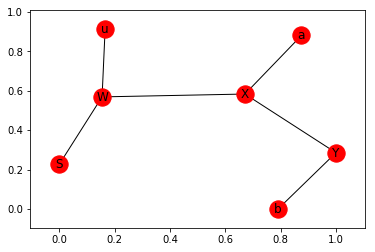

In [10]:
prod_prod_rec1(1,10)